In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1=pd.read_csv('NID_revised_cleanData.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1593 non-null   object 
 1   Metro           1593 non-null   object 
 2   SiteType        1593 non-null   object 
 3   DeploymentType  1593 non-null   object 
 4   NIDPM           1593 non-null   object 
 5   DPM             1593 non-null   object 
 6   IsMainstream    1593 non-null   bool   
 7   FacilityCode    1593 non-null   object 
 8   ClassType       1593 non-null   object 
 9   CT              1593 non-null   float64
 10  CT_Status       1593 non-null   object 
 11  CT_Indicator    1593 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 138.6+ KB


In [4]:
df1.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT,CT_Status,CT_Indicator
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.0,Out-of SLA,Yellow
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.0,Out-of SLA,Yellow
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.0,Out-of SLA,Yellow
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C,91.0,With-in SLA,Green
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E,117.0,With-in SLA,Green


In [5]:
df1['CT_Status'].value_counts()

Out-of SLA     1094
With-in SLA     499
Name: CT_Status, dtype: int64

In [6]:
df1['CT_Status'].value_counts(normalize=True)*100

Out-of SLA     68.675455
With-in SLA    31.324545
Name: CT_Status, dtype: float64

<AxesSubplot:>

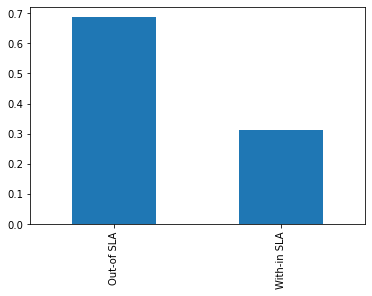

In [7]:
df1['CT_Status'].value_counts(normalize=True).plot.bar()

In [11]:
df1['CT_Indicator'].value_counts()

Yellow    634
Green     499
Orange    378
Red        82
Name: CT_Indicator, dtype: int64

In [10]:
df1['CT_Indicator'].value_counts(normalize=True)*100

Yellow    39.799121
Green     31.324545
Orange    23.728814
Red        5.147520
Name: CT_Indicator, dtype: float64

<AxesSubplot:>

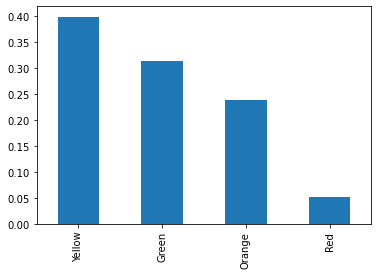

In [8]:
df1['CT_Indicator'].value_counts(normalize=True).plot.bar()

In [12]:
# Lets define predictors and Responce Varibale

x=df1.drop(['CT','CT_Indicator','CT_Status'],axis=1)
y=df1['CT_Indicator']

In [13]:
x.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E


In [14]:
# Will have to convert the categorical varibles into Dummy variables. 
x_encoded=pd.get_dummies(x,drop_first=True)

In [15]:
x_encoded.head()

,IsMainstream,Region_AMERWEST,Region_APAC,Region_EMEA,Metro_Abilene,Metro_Abu Dhabi,Metro_Agriport,Metro_Akron-Canton,Metro_Altus,Metro_Amarillo,...,FacilityCode_ZZV01,FacilityCode_ZZV70,ClassType_Class B,ClassType_Class C,ClassType_Class D,ClassType_Class E,ClassType_Class F,ClassType_Class G,ClassType_Missing,ClassType_Unknown
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
#value={'With-in SLA':1, 'Out-of SLA':0}
#y.replace(value,inplace=True)

In [16]:
y.sample(10)

1287       Red
679     Orange
1301    Yellow
1130     Green
52       Green
827      Green
30      Orange
260     Yellow
1166     Green
668     Yellow
Name: CT_Indicator, dtype: object

In [17]:
#Split the data into training and Testing
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_encoded,y,test_size=0.25,random_state=100)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
rc=RandomForestClassifier()
knn=KNeighborsClassifier()
svc=SVC()

In [20]:
rc_score=cross_val_score(rc,x_train,y_train,cv=5)
knn_score=cross_val_score(knn,x_train,y_train,cv=5)
svc_score=cross_val_score(svc,x_train,y_train,cv=5)

In [21]:
print (rc_score)
print ("RandomForest Score:",np.round(rc_score.mean(),2))
print (rc_score)
print ("KNN Score:",np.round(knn_score.mean(),2))
print (rc_score)
print ("SVM Score:",np.round(svc_score.mean(),2))

[0.69037657 0.66527197 0.69874477 0.69456067 0.73109244]
RandomForest Score: 0.7
[0.69037657 0.66527197 0.69874477 0.69456067 0.73109244]
KNN Score: 0.64
[0.69037657 0.66527197 0.69874477 0.69456067 0.73109244]
SVM Score: 0.68


## Random Forest Classifier

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_lencoded= x.apply(le.fit_transform)

In [25]:
x_lencoded.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType
0,0,64,2,5,15,12,0,211,0
1,0,64,2,5,15,12,0,211,0
2,0,64,2,5,15,12,0,211,0
3,0,36,5,1,16,32,0,170,2
4,1,109,4,17,6,46,0,379,4


In [26]:
#Split the data into training and Testing
from sklearn.model_selection import train_test_split
x_train1,x_val1,y_train1,y_val1=train_test_split(x_lencoded,y,test_size=0.25,random_state=100)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [27]:
RF1 = RandomForestClassifier()
parameters = {
    'n_estimators': [100,200,300],
    'max_depth': [5,7,10,12,15,20,25,30,35,40,37]
}

cv = GridSearchCV(RF1, parameters, cv=3,n_jobs = -1,verbose = 1)
cv.fit(x_train1, y_train1)
print_results(cv)

Fitting 3 folds for each of 33 candidates, totalling 99 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   23.9s finished


BEST PARAMS: {'max_depth': 40, 'n_estimators': 200}

0.608 (+/-0.029) for {'max_depth': 5, 'n_estimators': 100}
0.611 (+/-0.031) for {'max_depth': 5, 'n_estimators': 200}
0.616 (+/-0.035) for {'max_depth': 5, 'n_estimators': 300}
0.654 (+/-0.027) for {'max_depth': 7, 'n_estimators': 100}
0.649 (+/-0.04) for {'max_depth': 7, 'n_estimators': 200}
0.657 (+/-0.017) for {'max_depth': 7, 'n_estimators': 300}
0.657 (+/-0.017) for {'max_depth': 10, 'n_estimators': 100}
0.664 (+/-0.013) for {'max_depth': 10, 'n_estimators': 200}
0.668 (+/-0.021) for {'max_depth': 10, 'n_estimators': 300}
0.662 (+/-0.013) for {'max_depth': 12, 'n_estimators': 100}
0.665 (+/-0.02) for {'max_depth': 12, 'n_estimators': 200}
0.667 (+/-0.009) for {'max_depth': 12, 'n_estimators': 300}
0.654 (+/-0.013) for {'max_depth': 15, 'n_estimators': 100}
0.661 (+/-0.012) for {'max_depth': 15, 'n_estimators': 200}
0.663 (+/-0.022) for {'max_depth': 15, 'n_estimators': 300}
0.656 (+/-0.007) for {'max_depth': 20, 'n_estimators': 

In [28]:
rf=RandomForestClassifier(max_depth=40, n_estimators=200)

In [31]:
rf.fit(x_train1,y_train1)

RandomForestClassifier(max_depth=40, n_estimators=200)

In [32]:
prediction=rf.predict(x_val1)

In [33]:
print(classification_report(y_val1,prediction))

              precision    recall  f1-score   support

       Green       0.70      0.72      0.71       109
      Orange       0.67      0.69      0.68       107
         Red       0.75      0.60      0.67        25
      Yellow       0.68      0.68      0.68       158

    accuracy                           0.69       399
   macro avg       0.70      0.67      0.68       399
weighted avg       0.69      0.69      0.69       399



In [34]:
print(confusion_matrix(y_val1,prediction))

[[ 78   5   0  26]
 [  9  74   4  20]
 [  2   4  15   4]
 [ 23  27   1 107]]


In [35]:
importances=rf.feature_importances_

In [36]:
for feature in zip (x.columns, importances):
    print (feature)

('Region', 0.047287160836069486)
('Metro', 0.15707685623403073)
('SiteType', 0.07676738064796233)
('DeploymentType', 0.11474442140623974)
('NIDPM', 0.1509149877083493)
('DPM', 0.1779012357301684)
('IsMainstream', 0.008356246926383525)
('FacilityCode', 0.19083450263116356)
('ClassType', 0.07611720787963287)


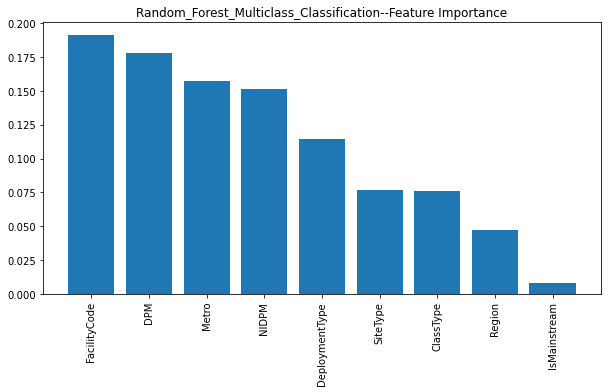

In [38]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10,5))

# Create plot title
plt.title("Random_Forest_Multiclass_Classification--Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()